## 2-canyon run, high N, f=0.5, longer forcing

Probe ANK1 upstream and ANK2 downstream, profiler probe P, no dye, probes bent. New profiler (Thanks Douw!) in place using probe P20 (20 cm shaft). Longer forcing time to see if we can get rid of inertial oscillations and smaller f to increase Rossby Radius into narrow canyon regime. Also smaller U to keep values of Rossby number close to Astoria's.


### Specifics and notes
* 800 g salt into bucket 1
* Douw's profiler.
* Conduino measurements every 30 min
* Used camera to check if shelf current spins down (track floating paper cuts).
* P20 is very noisy! weird spikes near high readings.
Calibration for probes from 02 May 2019 (https://nbviewer.jupyter.org/urls/bitbucket.org/canyonsubc/multipleCanyons/raw/tip/lab/Conduino/Calibration/notebooks/ANK_P20_probes_02may19.ipynb).

### Forcing
* Table profile f0=0.5, t1=21,0 s, f1=0.53, t2=71.0 s, f2=0.57 rad/s.
* Intertial period is $T=2\pi/f$ = 12.56 s, forcing is 1.67T = 21 s

### Stratification

Bucket 1 , 800 g salt

$\rho_1= 1.02972$ g cm$^{-3}$ at 20.016 C (tank bottom, I ruined bucket sample)

$\rho_2= 0.99813 $ g cm$^{-3}$ at 20.032 C

Samples at 15:10 pm from tank water:

$\rho_{bot}= 1.02259$ g cm$^{-3}$ at 20.001 C 

$\rho_{sb}= 1.017202 $ g cm$^{-3}$ at 20.001 C

$\rho_{surface-ish}= 1.01133 $ g cm$^{-3}$ at 20.004 C

### Tank filling
Started: 10:30 hrs, ended:  hrs. Mowgli disconnected from wifi and I had to do the whole show of plugging monitor, mouse and keyboard.

### Conduino measurements
Conduino measurements

|time|What for?|file|
|:--:|:-------:|:--:|
|12:25|Initial profile after filling|profiler_after_filling.mat|
|12:25|Initial base reading after filling|after_filling.mat|
|13:25|check up|checkup_13_20.mat|
|13:55|check up|checkup_13_50.mat|
|14:25|check up|checkup_14_20.mat|
|14:55|check up|checkup_14_20.mat|
|15:25|check up|checkup_15_25.mat|
|15:26|profile before experiment|before_exp_profile.mat|
|15:27|experiment|experiment.mat|
|15:28|profile after experiment|after_exp_profile.mat|

In [3]:
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy.polynomial import polynomial as P
import pandas as pd
#import seaborn as sns
import scipy.io as sio
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
sns.set_style('whitegrid')
sns.set_context('notebook')

In [5]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [6]:
def time_to_dist(time, tot_dep=9.5, omega=0.545, offset=0):
    '''default values: 
    omega = 0.545
    tot_dep = 9.5 cm, total depth the probe travels from surface to bottom
    offset = 0 s, we want to start at the top of the probe cycle'''
    tt = time-offset
    tot_dep = -9.5 # cm
    A = tot_dep/2 
    B = tot_dep/2 
    omega = 0.545
    dist = A*np.sin(omega*tt-np.pi/2)+B
    return tt, dist

def densP(read):
    ''' Calibration from 02 May 2019 in ANK_P20_probes_02may19.ipynb'''
    fitP = 0.998176+(0.001940*read)+(0.001296*read**2)-(0.000073*read**3)
    return(fitP)

def dens_ANK1(read):
    '''Calibration from 02 May 2019 in ANK_P20_probes_02may19.ipynb'''
    rho_1 = 0.998102+0.004567*read+0.000676*read**2+0.000056*read**3 
    return(rho_1)

def dens_ANK2(read):
    '''Calibration from 02 May 2019 in ANK_P20_probes_02may19.ipynb '''
    rho_2 = 0.997984+0.004090*read+0.001643*read**2+0.000193*read**3 
    return(rho_2)

def plot_uprofile(ax, col='0.8'):
    ax.axvline(21.0, color=col, linestyle=':')
    ax.axvline(71.0, color=col, linestyle=':')
        
def plot_forcing(ax, file, f0, f1, f2, t0, t1):
    '''ax: axes to plot figure on
       file: experiment file to extract time
       f0: Angular velocity of the table during spin up
       f1: f at max forcing
       f2: f to avoid spin down
       t0: time to get to f1
       t1: time to get to f2'''
    mat = sio.loadmat(file, squeeze_me=True)
    time = mat['time']
    t2 = np.round(np.max(time),2) # s

    ax0.text(0.3,0.3,r'$\Delta f_1=$%1.2f rad/s, $\Delta t_1=$%1.1f s' %((f1-f0),t0), transform=ax0.transAxes)
    ax0.text(0.5,0.7,r'$\Delta f_2=$%1.2f rad/s, $\Delta t_2=$%1.1f s' %((f2-f1),(t1-t0)), transform=ax0.transAxes)

    ax0.plot([0,t0,t1,t2],[f0,f1,f2,f2], 'g-')
    ax0.set_ylabel('f table / rad s$^{-1}$')
    ax0.set_xlabel('time / s')

Probes ANK1 upstream and ANK2 downstream. Both near head

|Channel|Probe|
|::|::|
|'ch1':|ANK1|
|'ch2':|ANK2|
|'ch3':|P20|



### Forcing

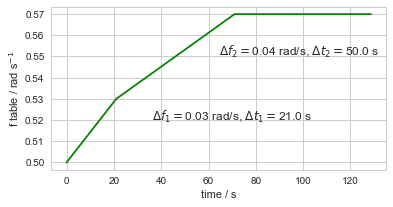

In [8]:
fig, ax0 = plt.subplots(1,1, figsize=(6,3), sharex=True)

f0 = 0.50 # initial f rad/s
f1 = 0.53 # rad/s
f2 = 0.57 # rad/s
t0 = 21.0 # s
t1 = 71.0 # s
exp_file = '../../exp_16may19/experiment.mat'

plot_forcing(ax0, exp_file, f0, f1, f2, t0, t1)

### All readings 

Text(0.5,0,'time / s')

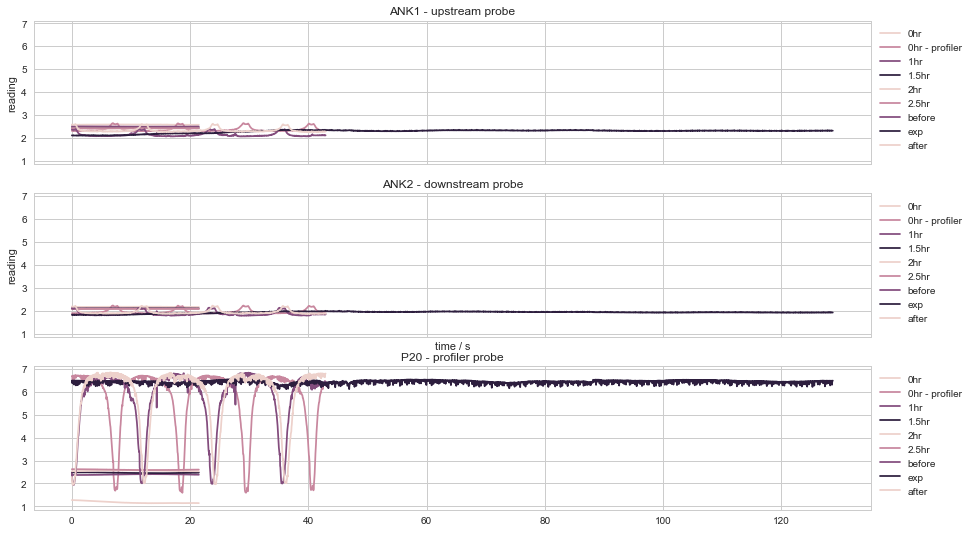

In [24]:
fig, (ax0,ax1, ax2) = plt.subplots(3,1, figsize=(15,9), sharex=True, sharey=True)

labels = ['0hr','0hr - profiler','1hr ','1.5hr','2hr','2.5hr', 'before', 'exp', 'after']

filepaths = ['../../exp_16may19/after_filling.mat',
             '../../exp_16may19/profiler_after_filling.mat',
             '../../exp_16may19/checkup_13_25.mat',
             '../../exp_16may19/checkup_13_55.mat',
             '../../exp_16may19/checkup_14_25.mat',
             '../../exp_16may19/checkup_14_55.mat', #* did I mislabeled 15:25?
             '../../exp_16may19/before_exp_profile.mat',
             '../../exp_16may19/experiment.mat',
             '../../exp_16may19/after_exp_profile.mat',
             ]

for filepath, lab in zip(filepaths, labels):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']
    P2 = mat['ch2']
    P3 = mat['ch3']
    time = mat['time']
    ax0.plot(time,P1, label=lab)
    ax1.plot(time,P2, label=lab)
    ax2.plot(time,P3, label=lab)

ax0.legend(bbox_to_anchor=(1,1))
ax1.legend(bbox_to_anchor=(1,1))
ax2.legend(bbox_to_anchor=(1,1))

ax1.set_ylabel('reading')#'density / g cm$^{-3}$')
ax0.set_ylabel('reading')#'density / g cm$^{-3}$')
ax0.set_title('ANK1 - upstream probe')
ax1.set_title('ANK2 - downstream probe')
ax2.set_title('P20 - profiler probe')

ax1.set_xlabel('time / s')

**Drift: Change in density throughout spin up**

Text(0.5,0,'time / s')

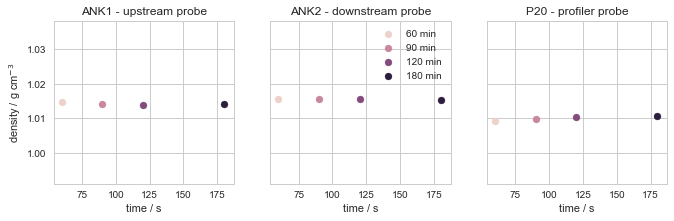

In [15]:
fig, (ax0,ax1,ax2) = plt.subplots(1,3, figsize=(11,3), sharey=True)

time_checkup = [60,90,120,180] # min

filepaths = ['../../exp_16may19/checkup_13_25.mat',
             '../../exp_16may19/checkup_13_55.mat',
             '../../exp_16may19/checkup_14_25.mat',
             '../../exp_16may19/checkup_14_55.mat',
             ]

sns.set_palette(sns.cubehelix_palette(len(filepaths)))
for filepath, time_ch in zip(filepaths, time_checkup):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']
    P2 = mat['ch2']
    P3 = mat['ch3']
    
    time = mat['time']
    densP1 = np.mean(dens_ANK1(P1))
    densP2 = np.mean(dens_ANK2(P2))
    densP3 = np.mean(densP(P3))
    ax0.scatter(time_ch,densP1, label='%s min' %time_ch)
    ax1.scatter(time_ch,densP2, label='%s min' %time_ch)
    ax2.scatter(time_ch,densP3, label='%s min' %time_ch)
    
ax1.legend(loc=0)

ax0.set_ylabel('density / g cm$^{-3}$')
ax0.set_title('ANK1 - upstream probe')
ax1.set_title('ANK2 - downstream probe')
ax2.set_title('P20 - profiler probe')

ax0.set_xlabel('time / s')
ax1.set_xlabel('time / s')
ax2.set_xlabel('time / s')
#ax0.set_ylim(1.012,1.020)

### Profiles

(0, 45)

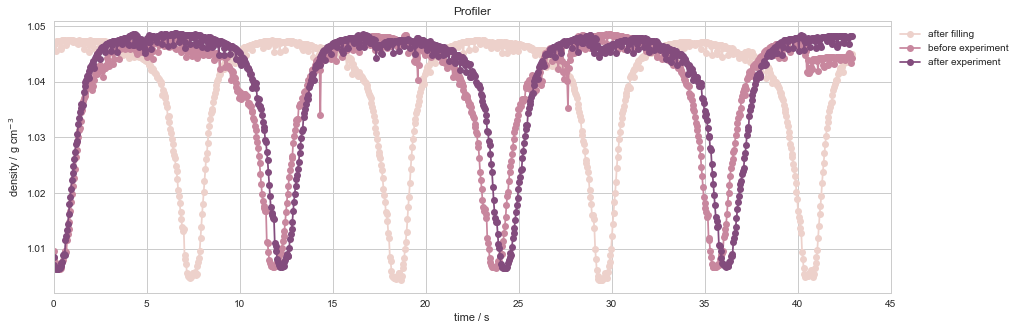

In [18]:
fig, (ax0) = plt.subplots(1,1, figsize=(15,5), sharex=True)
labels=['after filling','before experiment', 'after experiment']

filepaths = ['../../exp_16may19/profiler_after_filling.mat',
             '../../exp_16may19/before_exp_profile.mat',
             '../../exp_16may19/after_exp_profile.mat',
             ]

for filepath, lab in zip(filepaths, labels):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P3 = mat['ch3']# dens_B(mat['ch1'])
    time = mat['time']
    densP3 = densP(P3)
    
    ax0.plot(time,densP3,'o-', label=lab)
ax0.legend(bbox_to_anchor=(1,1))

ax0.set_ylabel('density / g cm$^{-3}$')
ax0.set_title('Profiler')
ax0.set_xlabel('time / s')
ax0.set_xlim(0,45)

### Experiment

../../exp_16may19/experiment.mat


Text(0.5,0,'sample')

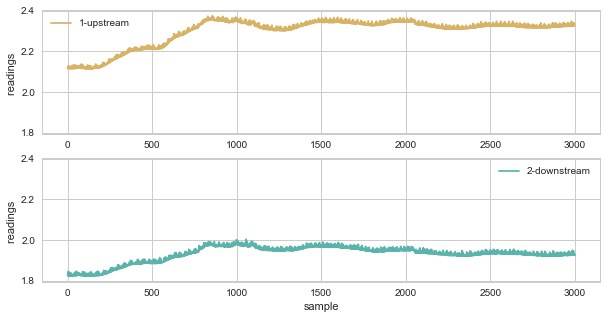

In [20]:
fig, (ax0,ax1) = plt.subplots(2,1, figsize=(10,5), sharey=True)
labels = ['1-upstream','2-downstream']
colors = ['#d8b365','#5ab4ac']

filepath = '../../exp_16may19/experiment.mat'
print(filepath)
    
mat = sio.loadmat(filepath, squeeze_me=True)
P1 = mat['ch1']
P2 = mat['ch2']
time = mat['time']
ax0.plot(P1,'-', label=labels[0], color=colors[0])
ax1.plot(P2,'-', label=labels[1], color=colors[1])
ax0.legend(loc=0)
ax1.legend(loc=0)
ax0.set_ylabel('readings ')
ax1.set_ylabel('readings ')
ax1.set_xlabel('sample')

Text(0.5,1,'Probe density')

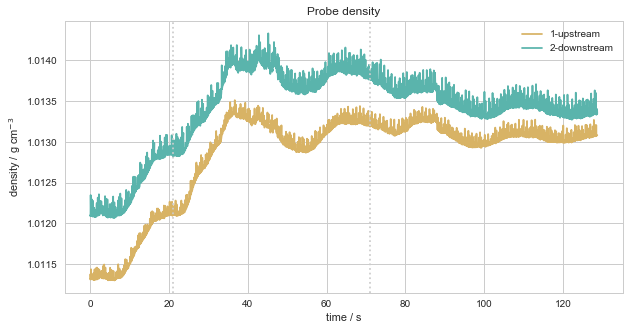

In [21]:
fig, (ax0) = plt.subplots(1,1, figsize=(10,5), sharey=True)

ax0.plot(time,dens_ANK1(P1),'-', label=labels[0], color=colors[0])
ax0.plot(time,dens_ANK2(P2),'-', label=labels[1], color=colors[1])
plot_uprofile(ax0)
ax0.legend(bbox_to_anchor=(1,1))
ax0.set_ylabel('density / g cm$^{-3}$')
ax0.set_xlabel('time / s')
ax0.set_title('Probe density')


Text(0.5,1,'Probe density minus initial density')

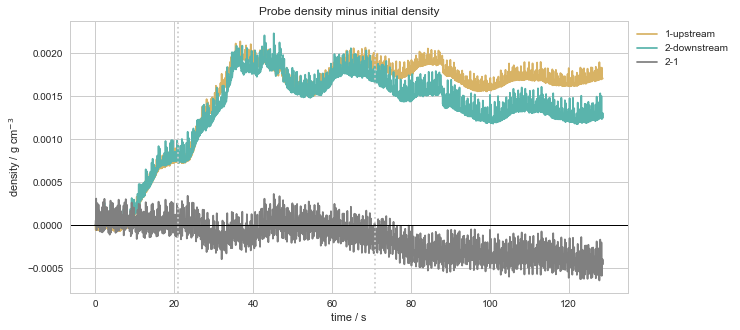

In [22]:
fig, (ax0) = plt.subplots(1,1, figsize=(10,5), sharey=True)

ax0.plot(time,dens_ANK1(P1)-dens_ANK1(P1)[0],'-', label=labels[0], color=colors[0])
ax0.plot(time,dens_ANK2(P2)-dens_ANK2(P2)[0],'-', label=labels[1], color=colors[1])
ax0.plot(time,dens_ANK2(P2)-dens_ANK2(P2)[0]-(dens_ANK1(P1)-dens_ANK1(P1)[0]),'-', label='2-1', color='0.5')
plot_uprofile(ax0)
ax0.axhline(0,color='k', linewidth=1)
ax0.legend(bbox_to_anchor=(1,1))
ax0.set_ylabel('density / g cm$^{-3}$')
ax0.set_xlabel('time / s')
ax0.set_title('Probe density minus initial density')


Is the noise from probe P20 affecting ANK1 and ANK2 readings or is the whole system noisy?